# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,LeakyReLU,MaxPooling2D,Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
import h5py

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
#Load h5 file
file_h5 = h5py.File('/content/SVHN_single_grey1.h5', 'r')

In [ ]:
#Split intro train and test datasets
X_train = file_h5['X_train'][:]
y_train = file_h5['y_train'][:]
X_test = file_h5['X_test'][:]
y_test = file_h5['y_test'][:]

In [ ]:
file_h5.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train)

42000

In [ ]:
len(X_test)

18000

**Observation:**
The train dataset has 42000 images and the test dataset has 18000.

In [ ]:
X_train.shape

(42000, 32, 32)

The images of the training data have 32x32 dimension.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

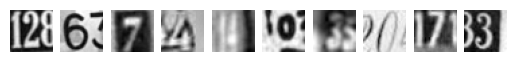

[2 6 7 4 4 0 3 0 7 3]


In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i],cmap = "gray")
  plt.axis('off')
plt.show()
print(y_train[0:10])

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape of the images
print('Shape:',X_train[0].shape)

#Pixels of image 1
print('1st image pixels:\n',X_train[0])

Shape: (32, 32)
1st image pixels:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
#Flatten the datasets

X_train = X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)

### **Normalize the train and the test data**

In [ ]:
#Normalizing test and train data from 0-255 to 0-1
X_train_norm = X_train.astype('float32')/255.0
X_test_norm = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
print('Train dataset:',X_train_norm.shape,y_train.shape)
print('Test dataset:',X_test_norm.shape,y_test.shape)

Train dataset: (42000, 1024) (42000,)
Test dataset: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Every element of the test set is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
import random
np.random.seed(18)

random.seed(18)
tf.random.set_seed(18)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
def ann_mod1():
  model = Sequential()

  #Layers of the ANN
  model.add(Dense(64, activation='relu', input_shape=(1024,)))

  model.add(Dense(32,activation='relu'))

  model.add(Dense(10,activation='softmax'))

  #Compilation
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
  return model

In [ ]:
model_ann1 = ann_mod1()

In [ ]:
#Summary of the model
model_ann1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                65600     
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit

history_model_ann1 = model_ann1.fit(X_train,y_train,
                              validation_split=0.2,
                              batch_size=128,
                              verbose=1,
                              epochs=20)

Epoch 1/20
263/263 [==============================] - 7s 14ms/step - loss: 11.7016 - accuracy: 0.1030 - val_loss: 5.1107 - val_accuracy: 0.1057
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 3.6335 - accuracy: 0.1134 - val_loss: 2.7909 - val_accuracy: 0.1257
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 2.6963 - accuracy: 0.1366 - val_loss: 2.6806 - val_accuracy: 0.1371
Epoch 4/20
263/263 [==============================] - 1s 5ms/step - loss: 2.4290 - accuracy: 0.1636 - val_loss: 2.3867 - val_accuracy: 0.1744
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 2.3040 - accuracy: 0.2015 - val_loss: 2.3291 - val_accuracy: 0.2093
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1232 - accuracy: 0.2598 - val_loss: 2.2852 - val_accuracy: 0.2154
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0035 - accuracy: 0.3034 - val_loss: 1.9493 - val_accuracy: 0.3414
Epoc

### **Plot the Training and Validation Accuracies and write down your Observations.**

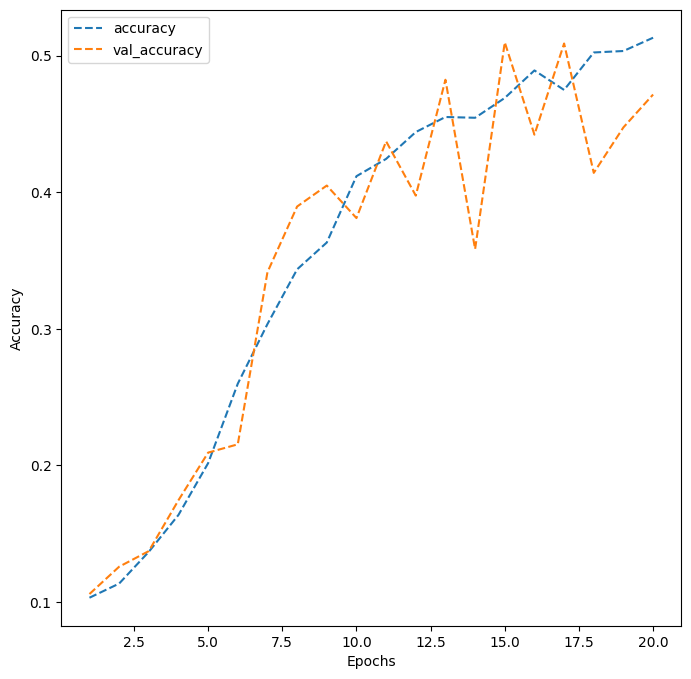

In [ ]:
acc_hist = history_model_ann1.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))
plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')
plt.plot(epoch_list, acc_hist['val_accuracy'], ls = '--', label = 'val_accuracy')


plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

**Observations:**
The accuracy between the training and validation data is just slightly different in each one. It can be observed that the accuracy at early stages of epochs is low, but as the epochs develop the accuracy increases until a value of 0.5 for both sets.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
np.random.seed(18)
random.seed(18)

tf.random.set_seed(18)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
def ann_mod2():

    model = Sequential()

    #Layers

    model.add(Dense(256, activation='relu', input_shape=(1024,)))

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(64,activation='relu'))

    model.add(Dense(32,activation='relu'))

    model.add(BatchNormalization())
    model.add(Dense(10,activation='softmax'))

    # Compilation

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

In [ ]:
model_ann2 = ann_mod2()

In [ ]:
#Summary
model_ann2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 256)               262400    
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 64)                4160      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)              

In [ ]:
#Fit model
history_model_ann2 = model_ann2.fit(X_train,y_train,
                              validation_split=0.2,
                              batch_size=128,
                              verbose=1,
                              epochs=30)


Epoch 1/30
263/263 [==============================] - 5s 12ms/step - loss: 2.4013 - accuracy: 0.1006 - val_loss: 2.3134 - val_accuracy: 0.1089
Epoch 2/30
263/263 [==============================] - 5s 18ms/step - loss: 2.3024 - accuracy: 0.1204 - val_loss: 2.2417 - val_accuracy: 0.1670
Epoch 3/30
263/263 [==============================] - 5s 17ms/step - loss: 2.2498 - accuracy: 0.1481 - val_loss: 2.1653 - val_accuracy: 0.2095
Epoch 4/30
263/263 [==============================] - 4s 15ms/step - loss: 1.9750 - accuracy: 0.2754 - val_loss: 1.7984 - val_accuracy: 0.3973
Epoch 5/30
263/263 [==============================] - 3s 12ms/step - loss: 1.6808 - accuracy: 0.4078 - val_loss: 1.5681 - val_accuracy: 0.4752
Epoch 6/30
263/263 [==============================] - 3s 11ms/step - loss: 1.4513 - accuracy: 0.5169 - val_loss: 1.2648 - val_accuracy: 0.6052
Epoch 7/30
263/263 [==============================] - 3s 13ms/step - loss: 1.3079 - accuracy: 0.5742 - val_loss: 1.2497 - val_accuracy: 0.5900

### **Plot the Training and Validation Accuracies and write down your Observations.**

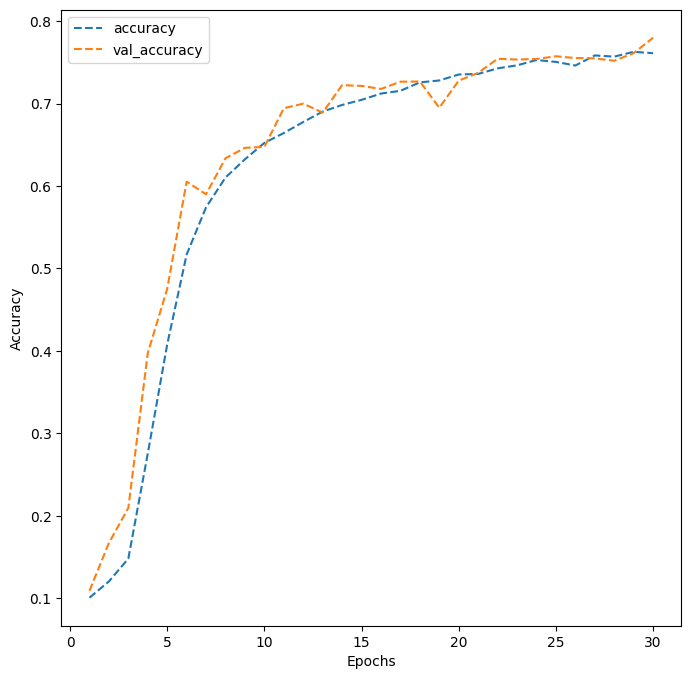

In [ ]:
acc_hist = history_model_ann2.history

epoch_list = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(epoch_list, acc_hist['val_accuracy'], ls ='--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
The accuracy of the test set keeps all the time under the train set. The accuracy of both sets increases with time. There is a great decreasing between epoch 15 and 20, but recovers quickly. The accuracy of the validation set has an increase near to 0.72. Better than the previous model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
pred_test = model_ann2.predict(X_test)

pred_test = np.argmax(pred_test, axis = -1)

563/563 [==============================] - 1s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1814
           1       0.70      0.85      0.76      1828
           2       0.81      0.79      0.80      1803
           3       0.76      0.72      0.74      1719
           4       0.75      0.86      0.80      1812
           5       0.73      0.75      0.74      1768
           6       0.81      0.74      0.78      1832
           7       0.83      0.79      0.81      1808
           8       0.76      0.70      0.73      1812
           9       0.77      0.75      0.76      1804

    accuracy                           0.77     18000
   macro avg       0.78      0.77      0.77     18000
weighted avg       0.78      0.77      0.77     18000



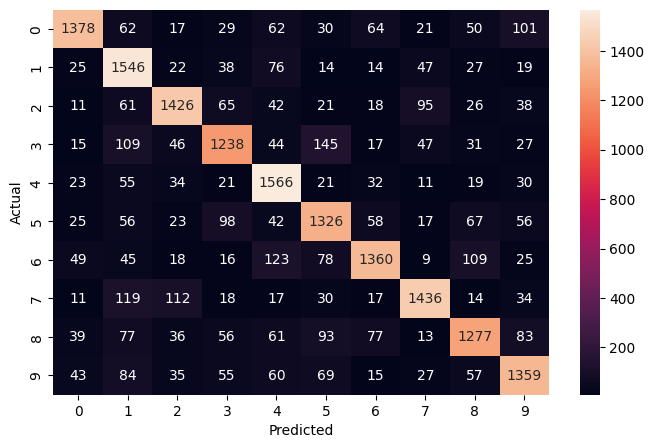

In [ ]:
# Classification report

print(classification_report(y_test,pred_test))

#Confusion matrix and heatmap
cm = confusion_matrix(y_test,pred_test)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:**
There are obvious misconceptions in this confusion matrix. There are numbers that are got wrong often, like 7,5 or 3, usually confused with 2,3 and 5 respectively. Its perfomance is moderately good, but could be better.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
h5f = h5py.File('/content/SVHN_single_grey1.h5', 'r')

In [ ]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

In [ ]:
h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train)

42000

In [ ]:
len(X_test)

18000

**Observation:**
The train dataset has 42000 images and the test dataset has 18000.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape of the first image
print("Shape:", X_train[0].shape)

#Array of the first image
print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
#Reshaping for correct input of CNNs
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
X_train_norm = X_train / 255.0

X_test_norm = X_test / 255.0

Print New shape of Training and Test

In [ ]:
print('Train dataset:', X_train_norm.shape, y_train.shape)
print('Test set:', X_test_norm.shape, y_test.shape)

Train dataset: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
Every element of the test set is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
np.random.seed(18)
random.seed(18)
tf.random.set_seed(18)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_mod1():

    model = Sequential()

    #Layers

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    model.add(Dense(10, activation='softmax'))

    # Compilation of the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
cnn_model_1 = cnn_mod1()

In [ ]:
cnn_model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
cnn_model_1_hist = cnn_model_1.fit(X_train,y_train,
                              validation_split=0.2,
                              batch_size=32,
                              verbose=1,
                              epochs=20)

Epoch 1/20
1050/1050 [==============================] - 114s 104ms/step - loss: 2.2588 - accuracy: 0.5048 - val_loss: 0.7713 - val_accuracy: 0.7708
Epoch 2/20
1050/1050 [==============================] - 103s 98ms/step - loss: 0.7053 - accuracy: 0.7937 - val_loss: 0.6769 - val_accuracy: 0.8102
Epoch 3/20
1050/1050 [==============================] - 97s 93ms/step - loss: 0.5905 - accuracy: 0.8307 - val_loss: 0.5809 - val_accuracy: 0.8342
Epoch 4/20
1050/1050 [==============================] - 102s 97ms/step - loss: 0.5142 - accuracy: 0.8497 - val_loss: 0.5787 - val_accuracy: 0.8393
Epoch 5/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.4746 - accuracy: 0.8630 - val_loss: 0.5825 - val_accuracy: 0.8407
Epoch 6/20
1050/1050 [==============================] - 104s 99ms/step - loss: 0.4381 - accuracy: 0.8726 - val_loss: 0.5970 - val_accuracy: 0.8412
Epoch 7/20
1050/1050 [==============================] - 99s 94ms/step - loss: 0.3978 - accuracy: 0.8817 - val_loss: 0.5

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
acc_hist = history_cnn_model_1.history

epoch_list = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(epoch_list, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(epoch_list, dict_hist['validation accuracy'], ls = '--', label = 'validation accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

NameError: ignored

<Figure size 800x800 with 0 Axes>

**Observations:**
The training set has an accuracy near 99%, even if the test set has a lower accuracy around 85% the performance of the model is suficiently good to identify a big part of the inputs correctly.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from tensorflow.keras import backend

backend.clear_session()

In [ ]:
np.random.seed(18)
random.seed(18)

tf.random.set_seed(18)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
def cnn_mod2():

    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence

    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(32,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))


    # Compile the model

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

In [ ]:
cnn_mod2 = cnn_mod2()

In [ ]:
cnn_mod2.summary()

In [ ]:
hist_cnn_mod2 = cnn_mod2.fit(X_train,y_train,
                              validation_split=0.2,
                              batch_size=128,
                              verbose=1,
                              epochs=30)

### **Plot the Training and Validation accuracies and write your observations.**

In [ ]:
acc_hist = hist_cnn_mod2.history

epoch_list = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(epoch_list, acc_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(epoch_list, acc_hist['validation accuracy'], ls = '--', label = 'validation accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**
This model performs better than the previous ones.
It has a better accuracy for both test and train sets and it is not too different one from another. Both have an accuracy near or superior to 0.9.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
pred_test = cnn_mod2.predict(X_test)
pred_test = np.argmax(pred_test,axis=-1)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

In [ ]:
print(classification_report(y_test, test_pred))

#Confusion matrix

cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (8, 5))

#Heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**